# HOW TO TEST THE YOLO MODEL USING OPEN CV AND PYTHON

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Yolo
net = cv2.dnn.readNet(r"yolov4-tiny_best.weights", r"yolov4-tiny.cfg")
classes = []
with open(r"multiple_images.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


In [3]:
output_layers

['yolo_30', 'yolo_37']

In [4]:
img = cv2.imread(r"470masked.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [5]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

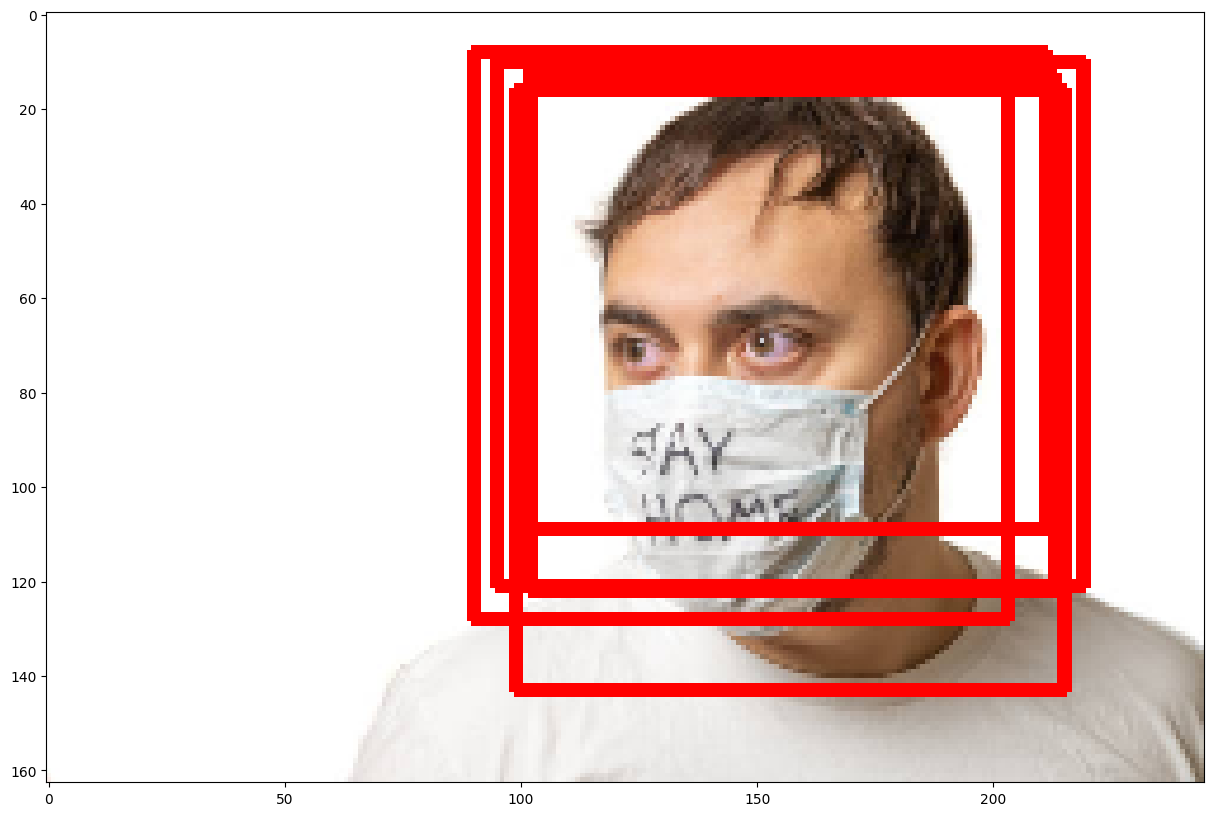

In [6]:
# Showing informations on the screen
img_rbg= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            cv2.rectangle(img_rbg, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize = (20,10))
plt.imshow(img_rbg)

In [7]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.7, 0.5)

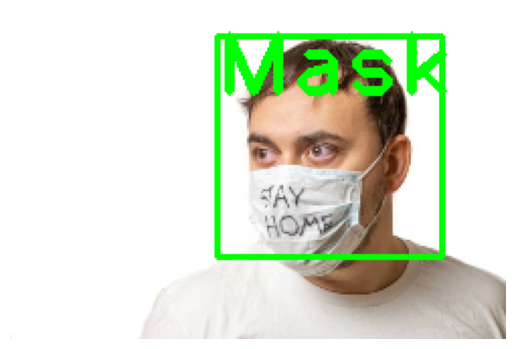

In [8]:

# for google colab

# from google.colab.patches import cv2_imshow

# font = cv2.FONT_HERSHEY_PLAIN
# for i in range(len(boxes)):
#     if i in indexes:
#         x, y, w, h = boxes[i]
#         label = str(classes[class_ids[i]])
#         color = (0,255,0)
#         cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
#         cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
# cv2_imshow(img)



import cv2
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = (0,255,0)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


